In [2]:
library(IRdisplay)
library(repr)
library(magrittr)
library(VennDiagram)
library(igraph)
library(leaflet)
library(osmar)

In [3]:
# install.packages("")

In [4]:
display_html("<style>
@import url('https://fonts.googleapis.com/css?family=Orbitron');
h1 {color: #3636ff; font-family:'Orbitron' ; text-shadow: 5px 5px 5px #aaa;}
div.output_area pre , div.output_area html {font-size:110%; color: #3636ff;}     
</style>")

## For creating posts

In [5]:
runif(1,-3,3)

[1] -0.7052713

# When you need to draw sets' intersection
Jupyter Notebook & R Kernel

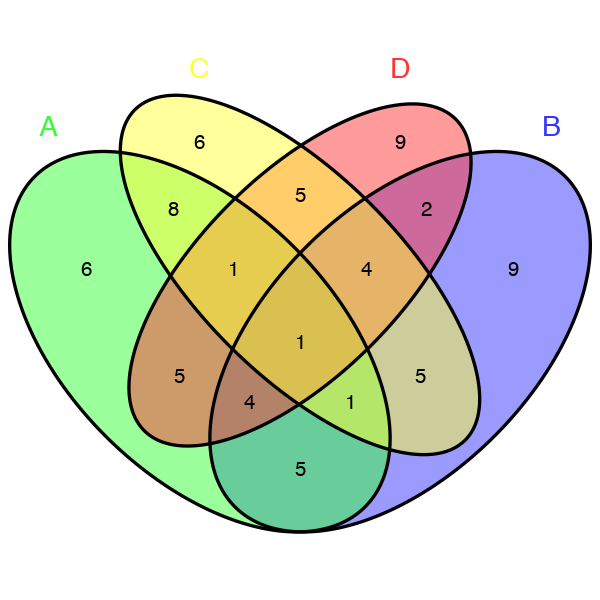

In [6]:
library(VennDiagram)
options(repr.plot.width=5,repr.plot.height=5)
c <- c("#36ff36","#3636ff","#ffff36","#ff3636")
venn.plot <- draw.quad.venn(
    area1=31,area2=31,area3=31,area4=31, 
    n12=11,n13=11,n14=11,n23=11,n24=11,n34=11, 
    n123=2,n124=5,n134=2,n234=5,n1234=1,
    category=c("A","B","C","D"),fill=c,cat.col=c,cat.cex=1.4)

# When you need to draw weighted graphs
Jupyter Notebook & R Kernel

In [7]:
library(igraph)
edges <- c('A','B', 'A','C', 'A','F', 'B','C', 'B','D',
           'C','D', 'C','E', 'D','E', 'D','F', 'E','F')
weights <- c(3,8,16,4,7,2,6,5,4,2)
g <- graph(edges, directed=FALSE)%>%
           set_edge_attr("weight", value=weights)
shortest_path <- get.shortest.paths(g,'A','F')
adjm <- get.adjacency(g, attr="weight",sparse=FALSE)
adjm[sort(rownames(adjm)),sort(colnames(adjm))]

,A,B,C,D,E,F
A,0,3,8,0,0,16
B,3,0,4,7,0,0
C,8,4,0,2,6,0
D,0,7,2,0,5,4
E,0,0,6,5,0,2
F,16,0,0,4,2,0


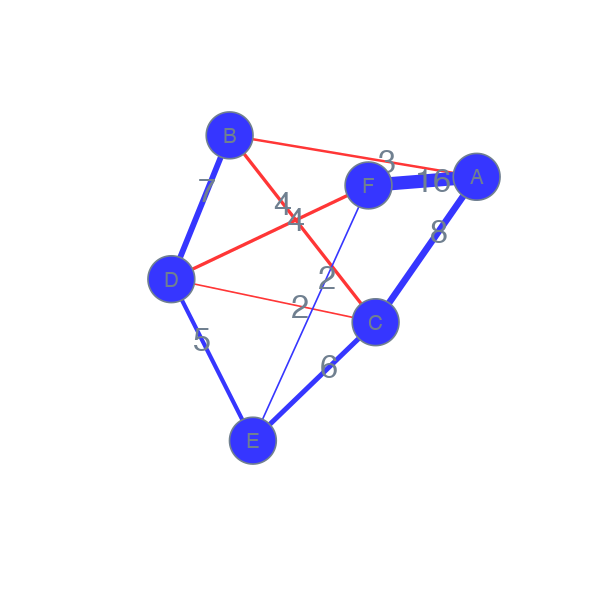

In [8]:
options(repr.plot.width=5,repr.plot.height=5)
E(g)$color <- "#3636ff"
E(g,path=unlist(shortest_path$vpath))$color <- "#ff3636"
plot(g,layout=layout_nicely(g),
     vertex.color="#3636ff",vertex.size=30,vertex.label.color="slategray",
     vertex.frame.color="slategray",edge.label.color="slategray",
     edge.label=E(g)$weight,edge.label.cex=1.6,edge.width=E(g)$weight/2)

# How to get a map in your notebook in a minute
Jupyter Notebook & R Kernel

In [10]:
library(leaflet); library(magrittr)
m <- leaflet() %>% setView(lng=38.9873,lat=55.8098,zoom=13)
m %>% addProviderTiles(providers$CartoDB.Positron)

HTML widgets cannot be represented in plain text (need html)

# If you think it's hard to create a map
# with absolutely free and open sources.
# Think again
Jupyter Notebook & R Kernel

Getting building contours as an example

In [11]:
library(osmar)
src <- osmsource_api(url="https://api.openstreetmap.org/api/0.6/"); 
box <- center_bbox(38.9873,55.8098,3000,3000); oz <- get_osm(box,source=src)

In [14]:
bg <- find(oz,way(tags(k=="building"))); bg <- find_down(oz,way(bg))
bg_oz <- subset(oz,ids=bg); bg_poly <- as_sp(bg_oz,"polygons")

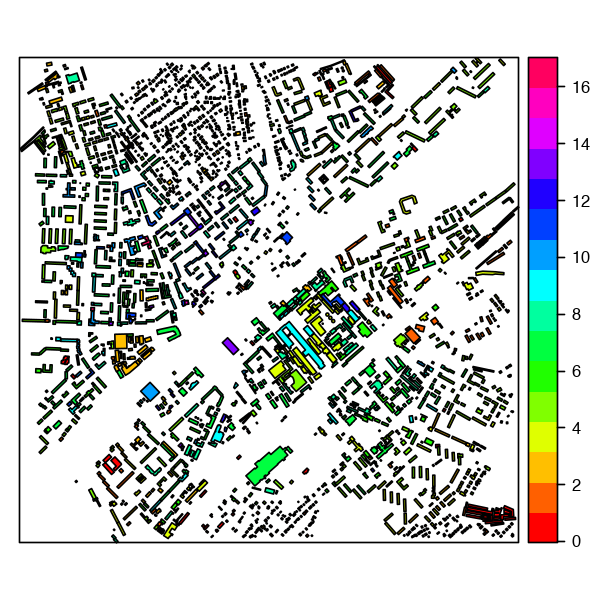

In [15]:
options(repr.plot.width=5,repr.plot.height=5)
spplot(bg_poly,col.regions=rainbow(16),c("version"))

# You probably don't believe me
# Network visualization has a chance to be fun
Jupyter Notebook & R Kernel

In [16]:
library(visNetwork); library(magrittr)
nodes <- data.frame(id=1:9,title=paste("node",1:9),
                    shape=c("dot","square","triangle"),
                    size=c(22,13,11,21,12,23,14,15,17),
                    color=c("#3636ff","#ff3636","#ff36ff"))
edges <- data.frame(from=1:9,to=c(2,3,1,1,2,3,4,5,6))
visNetwork(nodes,edges) %>% visOptions(highlightNearest=TRUE,nodesIdSelection=TRUE)

HTML widgets cannot be represented in plain text (need html)

# When you need to imagine segmentation
Jupyter Notebook & R Kernel

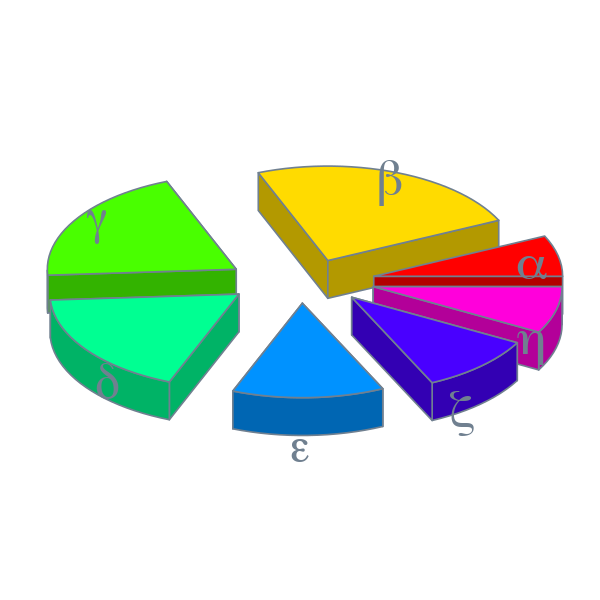

In [17]:
library(plotrix); options(repr.plot.width=5,repr.plot.height=5)
l <- c(expression(alpha,beta,gamma,delta,epsilon,zeta,eta))
v <- c(0.07,0.24,0.2,0.18,0.13,0.1,0.08)
pie3D(v,theta=pi/4,labels=l,shade=0.7,border='slategray',
      labelcol='slategray',labelcex=2.5,explode=0.4)

# When you think about experiments with regression
# Neural networks are not a bad idea

Jupyter Notebook & R Kernel

In [20]:
library(keras); boston <- dataset_boston_housing(test_split=0.2)
x_train <- boston$train$x; x_test <- boston$test$x; y_train <- boston$train$y; y_test <- boston$test$y
model <- keras_model_sequential() 
model %>%
  layer_dense(units=13,activation='relu',input_shape=c(13)) %>%
  layer_dense(units=104,activation='relu') %>%
  layer_dense(units=416,activation='relu') %>%
  layer_dropout(rate=0.2) %>% layer_dense(units=1)
model %>% compile(loss='mse',optimizer='nadam',metrics=c('mae'))
history <- model %>% fit(x_train,y_train,epochs=1000,batch_size=4,validation_split=0.2)
y_test_predict <- model %>% predict(x_test); model %>% evaluate(x_test,y_test)

$loss
[1] 26.61798

$mean_absolute_error
[1] 3.137034

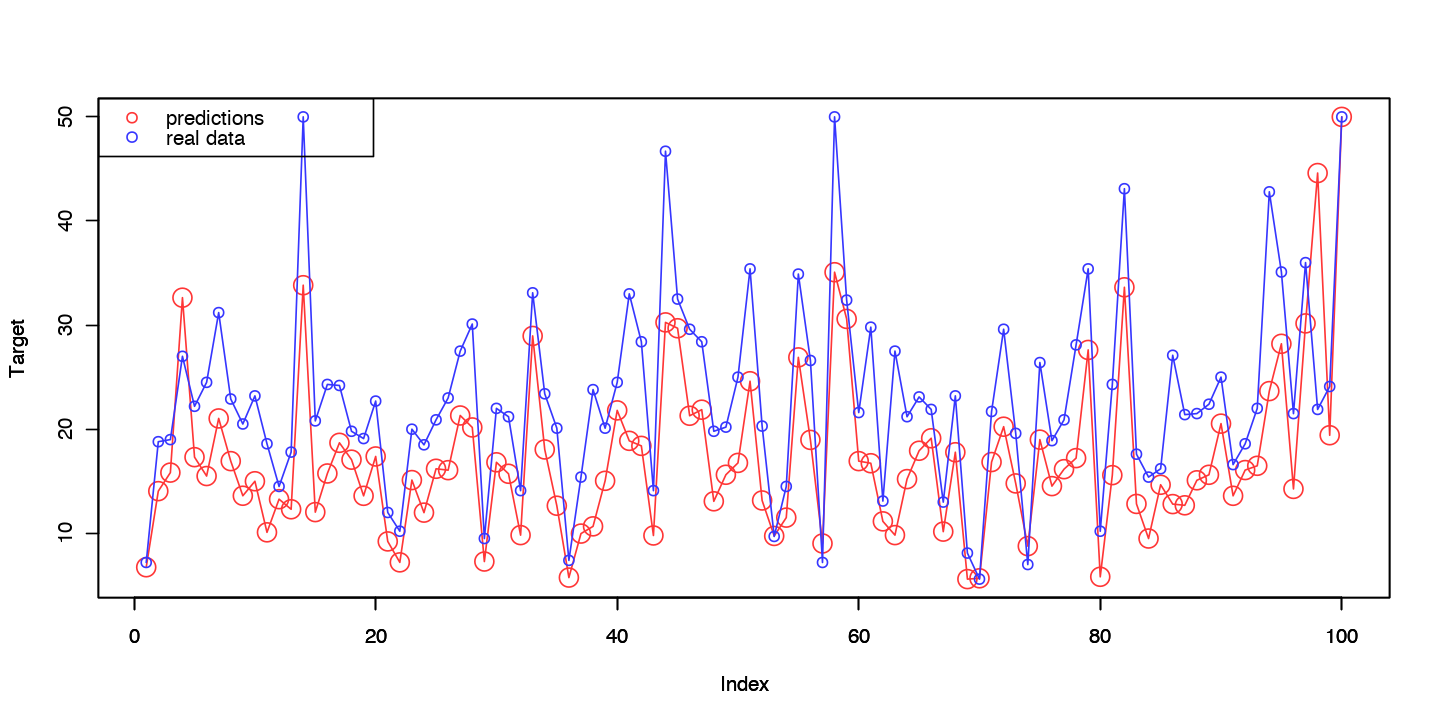

In [21]:
plot(y_test_predict[1:100],type="o",col="#ff3636",cex=2,xlab="Index",ylab="Target",yaxt="n")
options(repr.plot.width=12,repr.plot.height=6); par(new=TRUE)
plot(y_test[1:100],type="o",col="#3636ff",xlab="Index",ylab="Target")
legend("topleft",legend=c("predictions ","real data"),col=c("#ff3636","#3636ff"),pch=1)

# When you need to imagine group connections
Jupyter Notebook & R Kernel

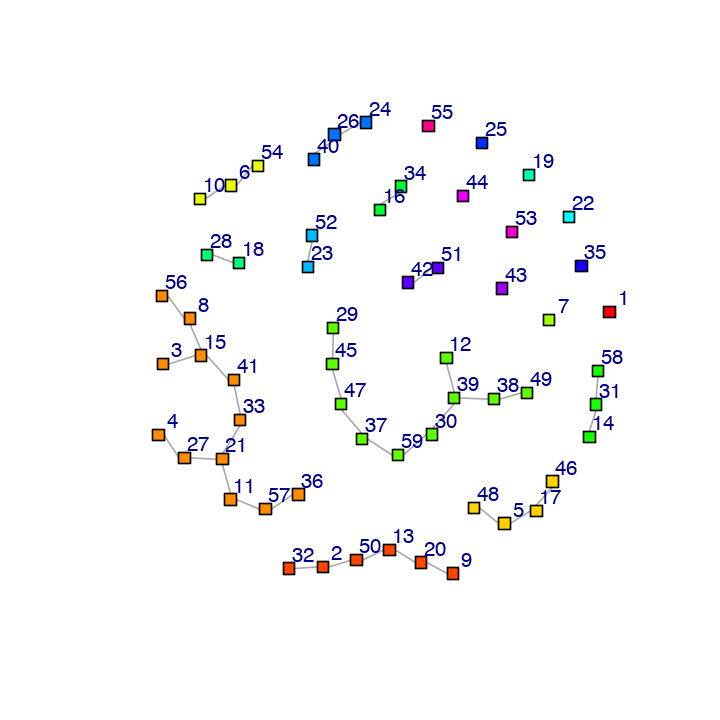

In [22]:
library(igraph); library(repr); options(repr.plot.width=6,repr.plot.height=6)
edges <- c(3,15, 8,15, 5,17, 9,20, 13,20, 11,21, 24,26, 4,27, 21,27, 18,28, 14,31, 2,32, 16,34, 
           21,33, 12,39, 30,39, 38,39, 26,40, 15,41, 33,41, 29,45, 37,47, 45,47, 5,48, 38,49, 
           2,50, 13,50, 42,51, 23,52, 6,54, 8,56, 11,57, 36,57, 31,58, 30,59, 37,59, 6,10, 46,17)
g <- graph(edges, directed=FALSE); members <- components(g)$membership 
colors <- rainbow(max(members)+1); V(g)$color <- colors[members]
plot(g,layout=layout_with_fr,vertex.size=5,vertex.shape="csquare",vertex.label.dist=1.2)

# When you want to check the linear dependence of variables
# with a few lines of code
Jupyter Notebook & R Kernel


Call:
lm(formula = x[, 9] ~ x[, 10], data = boston$train)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.158  -2.130   1.295   2.012   6.431 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -10.139602   0.440973  -22.99   <2e-16 ***
x[, 10]       0.048239   0.001005   47.98   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.358 on 402 degrees of freedom
Multiple R-squared:  0.8513,	Adjusted R-squared:  0.851 
F-statistic:  2302 on 1 and 402 DF,  p-value: < 2.2e-16


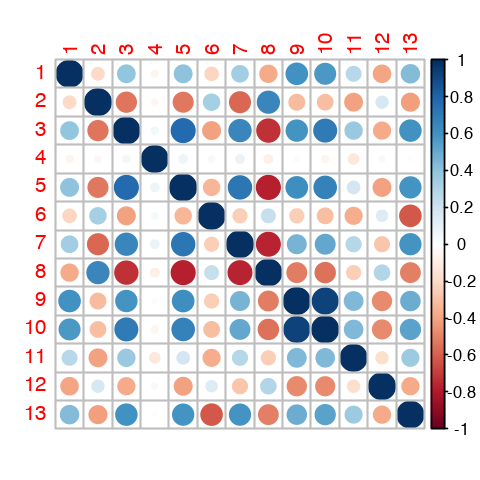

In [24]:
library(keras); boston <- dataset_boston_housing(test_split=0.2)
library(corrplot); library(repr); options(repr.plot.width=4,repr.plot.height=4)
corrplot(cor(boston$train$x)); summary(lm(x[,9]~x[,10],data=boston$train))

# If you want to see the gradient descent algorithm in action
# Just find the right iteration step
Jupyter Notebook & R Kernel
<p style="color:#ff3636;">Function: $f(x_1, x_2) = x_1^3 + 7 * (x_2 - 2)^2$ 
Partial Derivatives: $\frac{\partial f}{\partial x_1} = 3 * x_1^2,\ \frac{\partial f}{\partial x_2} = 14 * (x_2 - 2)$.</p>

In [28]:
gradient_descent <- function(f,df,start_point,iter_step=0.05,tolerance=10^(-8)) {
    gd <- function(x) {c(x[1]-iter_step*df(x)[1],x[2]-iter_step*df(x)[2])}
    min_x <- gd(start_point)
    while (abs(f(start_point)-f(min_x)) > tolerance) {
        start_point <- min_x; min_x <- gd(start_point)
        cat(f(min_x)); cat('\n')
    }
    min_x
}
f <- function(x) {x[1]^3+7*(x[2]-2)^2}; df <- function(x) {c(3*x[1]^2,14*(x[2]-2))};
start_point <- c(runif(1,-3,3),runif(1,1,4)) 
gradient_descent(f,df,start_point,0.1,1e-4)

0.2744734
0.09966657
0.05404635
0.03590015
0.02595436
0.01958223
0.01519689
0.01205315
0.009732875
0.007979831
0.006628981
0.005570213
0.004727969
0.004049144
0.00349563
0.003039572
0.002660272
0.002342122
0.002073193
0.001844259
0.001648106
0.001479032
0.001332494
0.001204836
0.001093096
0.0009948545


[1] 0.09982819 2.00000000

# If you want to plot the gradient descent algorithm in action
# Here it is
Jupyter Notebook & R Kernel
<p style="color:#ff3636;">Function: $f(x_1, x_2) = x_1^3 + 7 * (x_2 - 2)^2$ 
Partial Derivatives: $\frac{\partial f}{\partial x_1} = 3 * x_1^2,\ \frac{\partial f}{\partial x_2} = 14 * (x_2 - 2)$.</p>

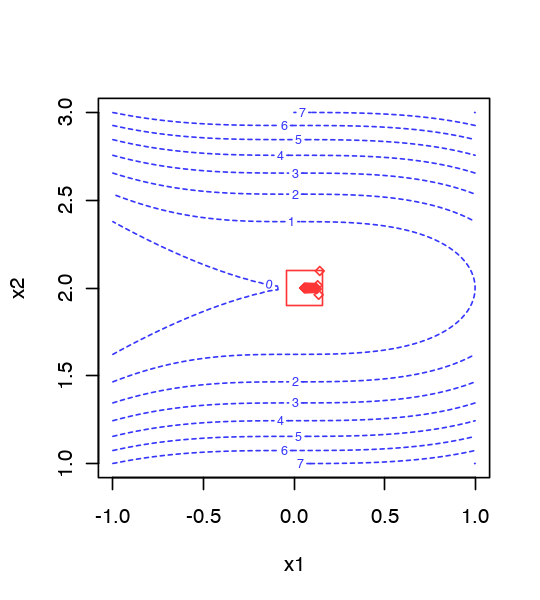

In [29]:
gradient_descent<-function(f,df,start_point,iter_step=0.05,tolerance=1e-8) {
    gd<-function(x) {c(x[1]-iter_step*df(x)[1],x[2]-iter_step*df(x)[2])}
    min_x<-gd(start_point); mx<-matrix(min_x,1,2)
    while (abs(f(start_point)-f(min_x))>tolerance) {start_point<-min_x; min_x<-gd(start_point); mx<-rbind(mx,min_x)}
    mx
}
f <- function(x) {x[1]^3+7*(x[2]-2)^2}; df <- function(x) {c(3*x[1]^2,14*(x[2]-2))};
n <- 100; x1 <- seq(-1,1,length.out=n); x2 <- seq(1,3,length.out=n)
start_point <- c(runif(1,-1,1),runif(1,1,3)); result <- gradient_descent(f,df,start_point,0.1,1e-5)

contour(x1,x2,outer(x1^3,7*(x2-2)^2,FUN="+"),col="#3636ff",xlab="x1",ylab="x2",lty = "dashed")
points(result,col="#ff3636",pch=5,cex=0.7); options(repr.plot.width=4.5,repr.plot.height=5)
gdr <- tail(result,1); rect(gdr[1]-0.1,gdr[2]-0.1,gdr[1]+0.1,gdr[2]+0.1,border="#ff3636")

## Additional material

In [31]:
library(grDevices)
svg(filename="Rplots.svg",widt=5,height=5,pointsize=12,onefile=TRUE,
    family="sans",bg="white",antialias = c("default","none","gray","subpixel"))
gradient_descent<-function(f,df,start_point,iter_step=0.05,tolerance=1e-8) {
    gd<-function(x) {c(x[1]-iter_step*df(x)[1],x[2]-iter_step*df(x)[2])}
    min_x<-gd(start_point); mx<-matrix(min_x,1,2)
    while (abs(f(start_point)-f(min_x))>tolerance) {start_point<-min_x; min_x<-gd(start_point); mx<-rbind(mx,min_x)}
    mx
}
f <- function(x) {x[1]^3+7*(x[2]-2)^2}; df <- function(x) {c(3*x[1]^2,14*(x[2]-2))};
n <- 100; x1 <- seq(-1,1,length.out=n); x2 <- seq(1,3,length.out=n)
start_point <- c(runif(1,-1,1),runif(1,1,3)); result <- gradient_descent(f,df,start_point,0.1,1e-5)

contour(x1,x2,outer(x1^3,7*(x2-2)^2,FUN="+"),col="#3636ff",xlab="x1",ylab="x2",lty = "dashed")
points(result,col="#ff3636",pch=5,cex=0.7); options(repr.plot.width=4.5,repr.plot.height=5)
gdr <- tail(result,1); rect(gdr[1]-0.1,gdr[2]-0.1,gdr[1]+0.1,gdr[2]+0.1,border="#ff3636")
dev.off()

pdf 
  2